<a href="https://colab.research.google.com/github/crusader2000/ml_training/blob/master/Yuxi%20Hayden%20Examples/News_Topic_classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_20newsgroups
import nltk
nltk.download('names')
nltk.download('wordnet')
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def letters_only(astr):
  return astr.isalpha()

def clean_text(docs):
  cleaned_docs = []
  for doc in docs:
    cleaned_docs.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in doc.split() if letters_only(word) and word not in all_names]))
  return cleaned_docs

In [0]:
categories = ['comp.graphics','sci.space']
data_train = fetch_20newsgroups(subset='train',categories=categories,random_state=42)
data_test = fetch_20newsgroups(subset='test',categories=categories,random_state=42)

In [0]:
cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target
print(len(label_train))
print(len(label_test))

1177
783


In [0]:
from collections import Counter
print(Counter(label_train))
print(Counter(label_test))

Counter({1: 593, 0: 584})
Counter({1: 394, 0: 389})


In [0]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english',max_features=8000)
term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.fit_transform(cleaned_test)

In [0]:
# Now we can apply our SVM algorithm with features ready. Initialize an SVC
# model with the kernel parameter set to linear (we will explain this shortly)
# and penalty C set to the default value 1 :
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
# Then fit our model on the training set:
svm.fit(term_docs_train,label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
accuracy = svm.score(term_docs_test,label_test)
print('The accuracy on testing set is:{0:.1f}%'.format(accuracy*100))

The accuracy on testing set is:54.3%


In [0]:
# MULTICLASS SVM CLASSIFICATION
categories = [
  'alt.atheism',
  'talk.religion.misc',
  'comp.graphics',
  'sci.space',
  'rec.sport.hockey'
  ]

data_train = fetch_20newsgroups(subset='train',categories=categories,random_state=42)
data_test = fetch_20newsgroups(subset='test',categories=categories,random_state=42)

cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target

term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.fit_transform(cleaned_test)

# In SVC, multiclass support is implicitly handled according to the one-vs-one
# scheme:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(term_docs_train,label_train)
accuracy = svm.score(term_docs_test,label_test)
print('The accuracy on testing set is:{0:.1f}%'.format(accuracy*100))

# We check how it performs for individual classes as follows:
from sklearn.metrics import classification_report
prediction = svm.predict(term_docs_test)
report = classification_report(label_test,prediction)
print(report)

The accuracy on testing set is:20.2%
              precision    recall  f1-score   support

           0       0.13      0.06      0.09       319
           1       0.21      0.37      0.27       389
           2       0.22      0.10      0.13       399
           3       0.24      0.25      0.25       394
           4       0.16      0.21      0.18       251

    accuracy                           0.20      1752
   macro avg       0.19      0.20      0.18      1752
weighted avg       0.20      0.20      0.19      1752



#The Kernels of SVM

In [0]:
# The most popular kernel function is the radial basis function (RBF) kernel
# (also called Gaussian kernel)
# let's apply RBF kernel with different values to a dataset:

import numpy as np
import matplotlib.pyplot as plt
X = np.c_[
# negative class
(.3, -.8),
(-1.5, -1),
(-1.3, -.8),
(-1.1, -1.3),
(-1.2, -.3),
(-1.3, -.5),
(-.6, 1.1),
(-1.4, 2.2),
(1, 1),
# positive class...
(1.3, .8),
(1.2, .5),
(.2, -2),
(.5, -2.4),
(.2, -2.3),
(0, -2.7),
(1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8
gamma_option = [1, 2, 4]

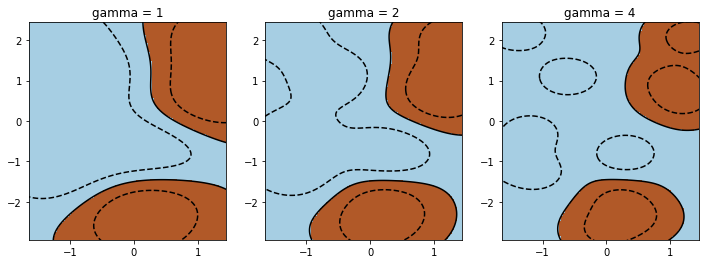

In [0]:
# We will visualize the dataset with corresponding decision boundary trained
# under each of the preceding three gamma

plt.figure(1,figsize=(4*len(gamma_option),4))

for i,gamma in enumerate(gamma_option,1):
  svm=SVC(kernel='rbf',gamma=gamma)
  svm.fit(X,Y)
  plt.subplot(1,len(gamma_option),i)
  plt.scatter(X[:,0],X[:,1],c=Y,zorder=10,cmap=plt.cm.Paired)
  plt.axis('tight')
  XX,YY = np.mgrid[-3:3:200j,-3:3:200j]
  Z = svm.decision_function(np.c_[XX.ravel(),YY.ravel()])
  Z=Z.reshape(XX.shape)
  plt.pcolormesh(XX,YY,Z>0,cmap=plt.cm.Paired)
  plt.contour(XX,YY,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-.5,0,.5])
  plt.title('gamma = %d'%gamma)

plt.show()

In [0]:
# It is finally time to build our state-of-the-art, SVM-based news topic classifier
# with all we just learned.
# Load and clean the news dataset with the whole 20 groups:
categories = None
data_train = fetch_20newsgroups(subset='train',categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test',categories=categories, random_state=42)

cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target

term_docs_train =tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

svc_libsvm = SVC(kernel='linear')
parameters = {'C': (0.1, 1, 10, 100)} 

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svc_libsvm, parameters,n_jobs=-1, cv=3)

import timeit
start_time = timeit.default_timer()
grid_search.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" %(timeit.default_timer() - start_time))

--- 406.580s seconds ---


In [0]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10}
0.8666260504741258


In [0]:
svc_libsvm_best = grid_search.best_estimator_
accuracy = svc_libsvm_best.score(term_docs_test, label_test)
print('The accuracy on testing set is:{0:.1f}%'.format(accuracy*100))

The accuracy on testing set is:76.2%


In [0]:
# How will anotherSVM classifier, LinearSVC, from scikit-learn perform? The LinearSVC is
# similar to the SVC with the linear kernel, but it is implemented based on the
# liblinear library instead of libsvm. We repeat the same preceding process
# for LinearSVC:

from sklearn.svm import LinearSVC
svc_linear = LinearSVC()
grid_search = GridSearchCV(svc_linear,parameters,n_jobs=-1,cv=3)

import timeit
start_time = timeit.default_timer()
grid_search.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" %(timeit.default_timer() - start_time))

print(grid_search.best_params_)
svc_linear_best = grid_search.best_estimator_
accuracy = svc_linear_best.score(term_docs_test, label_test)
print(grid_search.best_score_)

svc_linear_best = grid_search.best_estimator_
accuracy = svc_linear_best.score(term_docs_test, label_test)
print('The accuracy on testing set is:{0:.1f}%'.format(accuracy*100))

--- 18.550s seconds ---
{'C': 1}
0.8706917472827317
The accuracy on testing set is:77.9%


In [0]:
# We can also tweak the feature extractor, the TfidfVectorizer model, to
# further improve the performance. Feature extraction and classification as two
# consecutive steps should be cross-validated collectively. We utilize the
# pipeline API from scikit-learn to facilitate this.


# The tfidf feature extractor and linear SVM classifier are first assembled in
# the pipeline:

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('svc', LinearSVC()),])

parameters_pipeline = {
    'tfidf__max_df': (0.25, 0.5),
    'tfidf__max_features': (40000, 50000),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__smooth_idf': (True, False),
    'svc__C': (0.1, 1, 10, 100),
     }

grid_search = GridSearchCV(pipeline, parameters_pipeline,n_jobs=-1, cv=3)
start_time = timeit.default_timer()
grid_search.fit(cleaned_train, label_train)
print("--- %0.3fs seconds ---" %(timeit.default_timer() - start_time))
print(grid_search.best_params_)
print(grid_search.best_score_)
pipeline_best = grid_search.best_estimator_

# And finally is applied to the testing set:
accuracy = pipeline_best.score(cleaned_test, label_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

--- 662.937s seconds ---
{'svc__C': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 40000, 'tfidf__smooth_idf': False, 'tfidf__sublinear_tf': True}
0.888899176512086
The accuracy on testing set is: 80.6%


#Fetal state classification using RBF

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls

--2020-05-03 11:08:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1743872 (1.7M) [application/x-httpd-php]
Saving to: ‘CTG.xls’

CTG.xls             100%[===================>]   1.66M  8.54MB/s    in 0.2s    

2020-05-03 11:08:03 (8.54 MB/s) - ‘CTG.xls’ saved [1743872/1743872]



In [0]:
import pandas as pd
df = pd.read_excel('CTG.xls', "Raw Data")
X = df.iloc[1:2126, 3:-2].values
Y = df.iloc[1:2126, -1].values
Counter(Y)

Counter({1.0: 1654, 2.0: 295, 3.0: 176})

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

In [0]:
svc = SVC(kernel='rbf')
parameters = {'C': (100, 1e3, 1e4, 1e5),'gamma': (1e-08, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=3)
start_time = timeit.default_timer()
grid_search.fit(X_train, Y_train)
print("--- %0.3fs seconds ---" %(timeit.default_timer() - start_time))
print(grid_search.best_params_)
print(grid_search.best_score_)
svc_best = grid_search.best_estimator_

--- 11.522s seconds ---
{'C': 100000.0, 'gamma': 1e-07}
0.9447061902892292


In [0]:
accuracy = svc_best.score(X_test, Y_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

# Also check the performance for individual classes since the data is not quite
# balanced:
prediction = svc_best.predict(X_test)
report = classification_report(Y_test, prediction)
print(report)

The accuracy on testing set is: 95.5%
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       324
         2.0       0.89      0.91      0.90        65
         3.0       1.00      0.78      0.88        36

    accuracy                           0.96       425
   macro avg       0.95      0.89      0.92       425
weighted avg       0.96      0.96      0.95       425

